### K-Means Clustering 

In [76]:
import numpy as np

class KMeans:
    def __init__(self, K, max_iters=100):
        self.K = K
        self.max_iters = max_iters

    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.K, replace=False)]

        for _ in range(self.max_iters):
            # Assign clusters
            self.clusters = self.assign_clusters(X)

            # Update centroids
            new_centroids = self.update_centroids(X)

            # Check convergence
            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

    def assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def update_centroids(self, X):
        return np.array([X[self.clusters == i].mean(axis=0) for i in range(self.K)])

# Example usage
X = np.random.rand(100, 2)  # 100 data points in 2D space
kmeans = KMeans(K=3)
kmeans.fit(X)

print("Centroids:")
print(kmeans.centroids)
print("Cluster assignments:")
print(kmeans.clusters)

Centroids:
[[0.36295407 0.25039783]
 [0.31380189 0.78856978]
 [0.82414538 0.47628624]]
Cluster assignments:
[1 0 1 1 1 2 0 2 0 0 1 2 0 1 2 1 0 0 1 1 0 0 1 1 2 1 1 2 2 2 2 0 0 2 0 2 1
 2 1 0 2 1 0 0 2 1 1 1 0 2 0 1 0 0 2 0 2 0 1 1 0 0 0 2 2 0 2 1 1 2 2 2 2 0
 0 2 2 0 1 1 2 0 1 0 0 1 0 0 0 1 1 0 0 2 1 0 2 1 2 0]


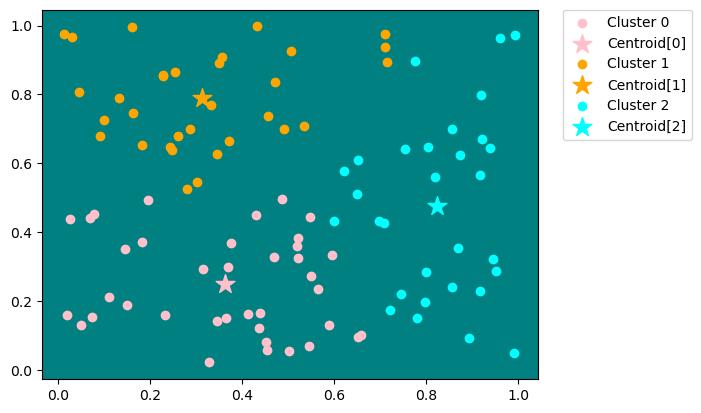

In [77]:
# Visualize the result
colors = ['pink','orange', 'aqua', 'orange', 'green', 'red'] 

# Set the background color
plt.gca().set_facecolor('teal')  # or any other color you prefer

for i in range(kmeans.K):
    cluster_points = X[kmeans.clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}')
    plt.scatter(kmeans.centroids[i, 0], kmeans.centroids[i, 1], marker='*', c=colors[i], s=200, label=f'Centroid[{i}]')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

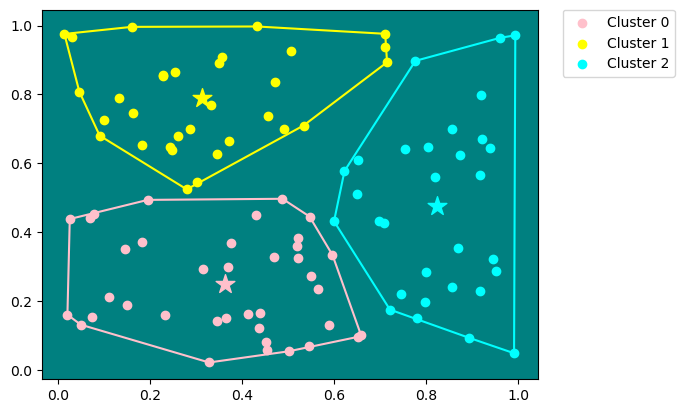

In [78]:
from scipy.spatial import ConvexHull

# Define a list of colors
colors = ['pink','yellow', 'aqua', 'orange', 'green', 'red'] 

# Set the background color
plt.gca().set_facecolor('teal')

for i in range(kmeans.K):
    cluster_points = X[kmeans.clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}')
    plt.scatter(kmeans.centroids[i, 0], kmeans.centroids[i, 1], marker='*', c=colors[i], s=200)

    # Create a ConvexHull object for the cluster points
    hull = ConvexHull(cluster_points, qhull_options='QJ' if len(cluster_points) > 4 else None)
    plt.plot(np.append(cluster_points[hull.vertices, 0], cluster_points[hull.vertices[0], 0]), np.append(cluster_points[hull.vertices, 1], cluster_points[hull.vertices[0], 1]), '-', c=colors[i])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

### K-Means++ Clustering 

In [79]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, K, max_iters=100):
        self.K = K
        self.max_iters = max_iters

    def fit(self, X):
        # Initialize centroids using k-means++ method
        self.centroids = self.initialize_centroids(X)

        for _ in range(self.max_iters):
            # Assign clusters
            self.clusters = self.assign_clusters(X)

            # Update centroids
            new_centroids = self.update_centroids(X)

            # Check convergence
            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

    def initialize_centroids(self, X):
        centroids = [X[np.random.choice(X.shape[0], 1)][0]]
        for _ in range(1, self.K):
            distances = np.linalg.norm(X[:, np.newaxis] - np.array(centroids), axis=2)
            min_distances = np.min(distances, axis=1)
            next_centroid_index = np.argmax(min_distances)
            centroids.append(X[next_centroid_index])
        return np.array(centroids)

    def assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def update_centroids(self, X):
        return np.array([X[self.clusters == i].mean(axis=0) for i in range(self.K)])

# Example usage
X = np.random.rand(100, 2)  # 100 data points in 2D space
kmeans = KMeans(K=3)
kmeans.fit(X)

print("Centroids:")
print(kmeans.centroids)
print("Cluster assignments:")
print(kmeans.clusters)



Centroids:
[[0.80107083 0.4823935 ]
 [0.27564062 0.77980039]
 [0.31943109 0.19016698]]
Cluster assignments:
[1 0 2 2 2 1 2 1 0 0 0 0 0 0 1 1 2 1 2 2 2 1 1 0 0 0 1 0 1 2 2 0 1 1 0 1 0
 0 2 0 0 1 2 1 0 1 2 0 0 2 1 0 0 2 0 0 0 2 0 1 2 2 0 2 2 0 2 2 2 0 2 0 2 2
 2 0 0 1 1 2 0 1 1 0 0 1 2 2 1 1 2 2 2 2 0 0 2 1 2 1]


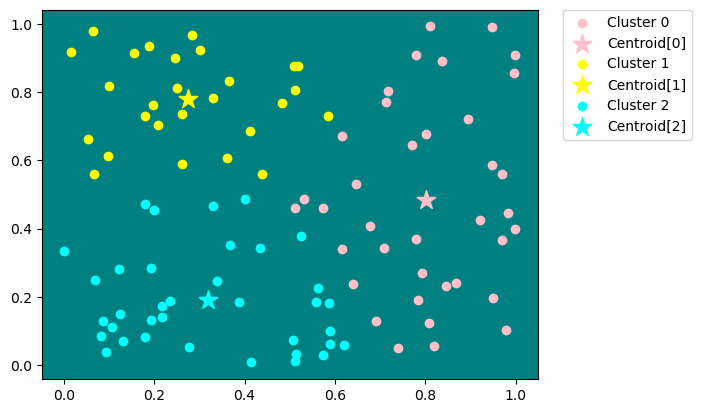

In [80]:
# Visualize the result
colors = ['pink','yellow', 'aqua', 'orange', 'green', 'red'] 

# Set the background color
plt.gca().set_facecolor('teal')  # or any other color you prefer

for i in range(kmeans.K):
    cluster_points = X[kmeans.clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}')
    plt.scatter(kmeans.centroids[i, 0], kmeans.centroids[i, 1], marker='*', c=colors[i], s=200, label=f'Centroid[{i}]')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

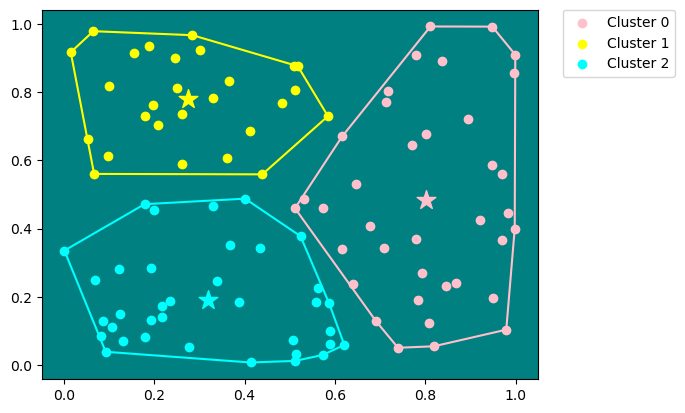

In [81]:
from scipy.spatial import ConvexHull

# Define a list of colors
colors = ['pink','yellow', 'aqua', 'orange', 'green', 'red'] 

# Set the background color
plt.gca().set_facecolor('teal')

for i in range(kmeans.K):
    cluster_points = X[kmeans.clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}')
    plt.scatter(kmeans.centroids[i, 0], kmeans.centroids[i, 1], marker='*', c=colors[i], s=200)

    # Create a ConvexHull object for the cluster points
    hull = ConvexHull(cluster_points, qhull_options='QJ' if len(cluster_points) > 4 else None)
    plt.plot(np.append(cluster_points[hull.vertices, 0], cluster_points[hull.vertices[0], 0]), np.append(cluster_points[hull.vertices, 1], cluster_points[hull.vertices[0], 1]), '-', c=colors[i])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

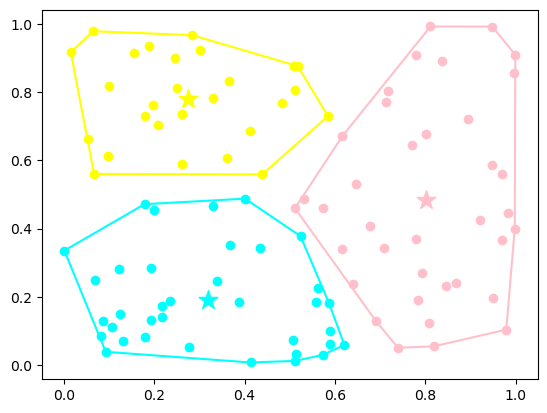

In [82]:
for i in range(kmeans.K):
    cluster_points = X[kmeans.clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}')
    plt.scatter(kmeans.centroids[i, 0], kmeans.centroids[i, 1], marker='*', c=colors[i], s=200)

    hull = ConvexHull(cluster_points)
    plt.plot(np.append(cluster_points[hull.vertices, 0], cluster_points[hull.vertices[0], 0]),
             np.append(cluster_points[hull.vertices, 1], cluster_points[hull.vertices[0], 1]), '-', c=colors[i])